In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from google.colab import drive

In [32]:
# Normalization Function
def normalize_image(img):
    return np.array(img) / 255.0


In [33]:
# Funcție pentru a încărca imaginile dintr-un singur folder
def load_images_from_folder(folder_path, emotion_label):
    data = []
    labels = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Acceptăm doar imagini
                img_path = os.path.join(root, file)
                img = Image.open(img_path).convert('RGB')
                img = img.resize((128, 128))
                img = normalize_image(img)
                if img.shape == (128, 128, 3):  # Asigurăm că dimensiunile sunt corecte
                    data.append(img.flatten())
                    labels.append(emotion_label)
    return np.array(data), np.array(labels)

In [34]:
# Calea datasetului
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/Dog Emotion'
emotions = ['angry', 'happy', 'sad']  # Categoriile
all_data = []
all_labels = []


In [35]:
# Încărcare treptată a imaginilor din fiecare folder
for emotion in emotions:
    print(f"Se încarcă imaginile pentru categoria: {emotion}")
    folder_path = os.path.join(dataset_dir, emotion)
    emotion_label = emotions.index(emotion)
    data, labels = load_images_from_folder(folder_path, emotion_label)
    all_data.append(data)
    all_labels.append(labels)
    print(f"Imagini încărcate din {emotion}: {len(data)}")


Se încarcă imaginile pentru categoria: angry
Imagini încărcate din angry: 975
Se încarcă imaginile pentru categoria: happy
Imagini încărcate din happy: 1000
Se încarcă imaginile pentru categoria: sad
Imagini încărcate din sad: 1000


In [36]:
# Combinăm toate datele într-un singur set
all_data = np.vstack(all_data)
all_labels = np.hstack(all_labels)

In [37]:
# Împărțirea datelor în seturi de antrenament, validare și test
x_train, x_temp, y_train, y_temp = train_test_split(all_data, all_labels, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [38]:
# Creare model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
# Validare pentru KNN
y_val_pred_knn = knn_model.predict(x_val)
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print(f'Validation Accuracy (KNN) : {val_accuracy_knn}')

Validation Accuracy (KNN) : 0.3991031390134529


In [42]:
# Testare și evaluare pe setul de test pentru KNN
y_pred_knn = knn_model.predict(x_test)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Test Accuracy: {test_accuracy_knn}')
print('KNN Classification Report:\n', classification_report(y_test, y_pred_knn))

KNN Test Accuracy: 0.4563758389261745
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.58      0.49       154
           1       0.47      0.46      0.46       138
           2       0.52      0.33      0.40       155

    accuracy                           0.46       447
   macro avg       0.47      0.46      0.45       447
weighted avg       0.47      0.46      0.45       447



In [43]:

# Creare model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [44]:
# Validare pentru Naive Bayes
y_val_pred_nb = nb_model.predict(x_val)
val_accuracy_nb = accuracy_score(y_val, y_val_pred_nb)
print(f'Validation Accuracy (Naive Bayes): {val_accuracy_nb}')

Validation Accuracy (Naive Bayes): 0.4551569506726457


In [45]:
# Testare și evaluare pe setul de test pentru Naive Bayes
y_pred_nb = nb_model.predict(x_test)
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Test Accuracy: {test_accuracy_nb}')
print('Naive Bayes Classification Report:\n', classification_report(y_test, y_pred_nb))

Naive Bayes Test Accuracy: 0.4451901565995526
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.28      0.35       154
           1       0.44      0.58      0.50       138
           2       0.44      0.49      0.46       155

    accuracy                           0.45       447
   macro avg       0.45      0.45      0.44       447
weighted avg       0.45      0.45      0.44       447



In [46]:

# Funcție pentru afișarea matricii de confuzie
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

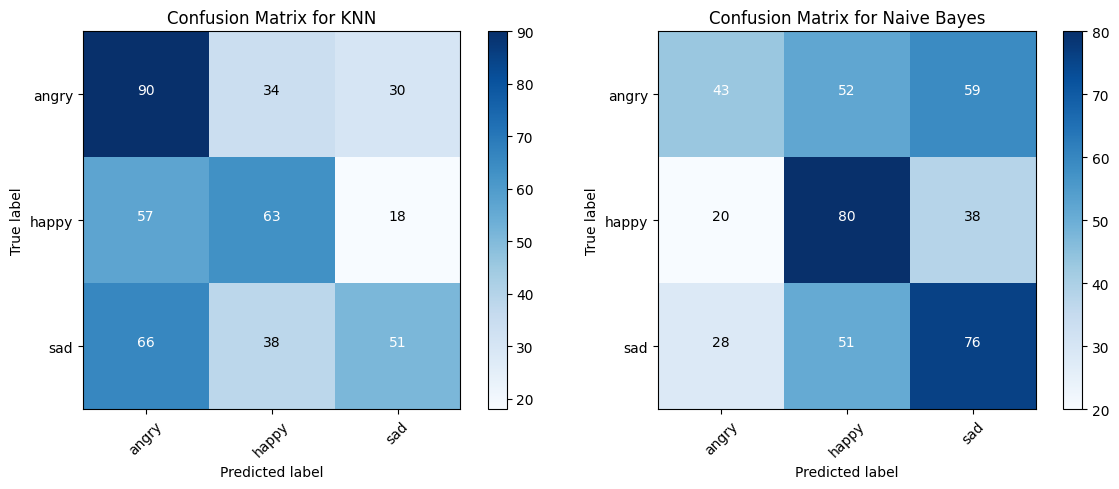

In [47]:
# Afișare matrici de confuzie
plt.figure(figsize=(12, 5))

# Matrice de confuzie pentru KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.subplot(1, 2, 1)
plot_confusion_matrix(conf_matrix_knn, classes=emotions, title='Confusion Matrix for KNN')

# Matrice de confuzie pentru Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.subplot(1, 2, 2)
plot_confusion_matrix(conf_matrix_nb, classes=emotions, title='Confusion Matrix for Naive Bayes')

plt.show()
